- # **1. Entendimiento del Negocio**

- ## **1.1. Descripción del problema:**
Dentro de una campaña de ventas se quiere incrementar y optimizar el número de ventas efectivas, en este sentido y como propuesta del área de analítica queremos realizar un modelo el cual prediga cuales son los clientes que tienen mayor probabilidad de pago.

- ## **1.1. Objetivos de la minería:**
Desarrollar un modelo predictivo que identifique con alta precisión a los clientes que tienen mayor probabilidad de completar sus transacciones de pago. Este modelo ayudará a optimizar las estrategias de asignación de recursos y maximizar la eficiencia de las campañas de ventas.



- # **2. Entendimiento de los Datos**

- ## **2.1. Diccionario de datos:**
Contamos con una base de datos con las siguientes variables, demográficas y de gestiones del cliente:

•	Client_ID:   El Id del Clinete
•	Name: Nombre del cliente                
•	Age: Edad del Cliente                 
•	Location: Estado donde vivel el Cliente            
•	Income: ingresos del Cliente             
•	TAX: impuestos que paga el cliente                 
•	previous sales_#   : Cantidad de compras que ha realizado en el pasado
•	Type_of_Products : Tipo de producto que ha comprado   
•	Contact_Channel  : Canal por el que se ha contactado al cliente
•	Contact_hour:    Hora de contacto
•	Num_Contacts : # de intentos que se han realizado para el contacto       
•	Satisfaction_Score: Medida de satisfacción (CSAT) 1 a 5 siendo 5 muy satisfecho
•	Sales: si la venta fue efectiva o no (1 Si, 0 No)               


- # **3. Preparación de Datos**

A continuación realizamos el EDA (Exploratory Data Analysis) a través del cuál se realizará el proceso de análisis de datos que implica explorar y comprender de manera preliminar los datos de ventas realizadas, antes de aplicar técnicas estadísticas más avanzadas y/o modelos de machine learning. El objetivo principal de este EDA es obtener una comprensión inicial de los datos, identificar patrones, tendencias, relaciones y posibles anomalías en los mismos.

In [ ]:
#Instalamos y Cargamos librerías requeridas

!pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=05eecbe456a63871c16e09fc686bdbdc753d26fb6c196b5d5c6b20321da46291
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


In [ ]:
!pip install --upgrade typing-extensions ydata_profiling

In [ ]:
import pandas as pd
import seaborn as sns
from ydata_profiling import ProfileReport
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

- ## **3.1. Descripción del dataset:**
Cargamos los datos para verificar su composición evidenciando lo siguiente:

In [ ]:
#Cargamos los datos
data = pd.read_excel('Sales_outbound.xlsx')
data.head()

,Client_ID,Name,Age,Location,Income,TAX,previous sales_#,Type_of_Products,Contact_Channel,Contact_hour,Num_Contacts,Satisfaction_Score,Sales
0,1,NaN,51,FL,80000.0,12000.00,1,B,Email,05:30:00,1,4,0
1,2,NaN,40,CA,82579.0,12386.85,5,A,Phone,16:45:00,2,4,1
2,3,NaN,25,NY,58380.0,8757.00,3,C,Online Chat,06:30:00,4,5,1
3,4,NaN,57,IL,75000.0,11250.00,0,A,Email,05:30:00,3,2,0
4,5,NaN,61,CA,50049.0,7507.35,0,B,Email,09:00:00,1,4,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Client_ID           1000 non-null   int64  
 1   Name                0 non-null      float64
 2   Age                 1000 non-null   int64  
 3   Location            1000 non-null   object 
 4   Income              996 non-null    float64
 5   TAX                 996 non-null    float64
 6   previous sales_#    1000 non-null   int64  
 7   Type_of_Products    1000 non-null   object 
 8   Contact_Channel     1000 non-null   object 
 9   Contact_hour        1000 non-null   object 
 10  Num_Contacts        1000 non-null   int64  
 11  Satisfaction_Score  1000 non-null   int64  
 12  Sales               1000 non-null   int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 101.7+ KB


Evidenciamos 1000 registros de clientes y 13
 variables en la que se observa lo siguiente:

- **name**: no tiene datos
- **Income** y **Tax**: tienen cada una 4 datos nulos (vacios)

Se tienen 6 de tipo int, 4 de tipo object y 3 datos de tipo float.

In [ ]:
#Confirmamos valores
data.isnull().sum()

Client_ID                0
Name                  1000
Age                      0
Location                 0
Income                   4
TAX                      4
previous sales_#         0
Type_of_Products         0
Contact_Channel          0
Contact_hour             0
Num_Contacts             0
Satisfaction_Score       0
Sales                    0
dtype: int64

In [ ]:
#Validamos los valores únicos de las variables tipo object
print(data['Location'].unique())
print(data['Type_of_Products'].unique())
print(data['Contact_Channel'].unique())

['FL' 'CA' 'NY' 'IL' 'TX']
['B' 'A' 'C']
['Email' 'Phone' 'Online Chat']


Evidenciamos que:
- **Location**: tienen tiene 5 posibles resultados ('FL' 'CA' 'NY' 'IL' 'TX')
- **Type_of_products**: hay 3 diferentes tipos de productos ('B' 'A' 'C')

- **Contact_Chanel**: 3 canales de contacto con los clientes

In [ ]:
#Validamos registros duplicados
data[data.duplicated()]

,Client_ID,Name,Age,Location,Income,TAX,previous sales_#,Type_of_Products,Contact_Channel,Contact_hour,Num_Contacts,Satisfaction_Score,Sales


Observamos que en el dataset no se encuentran registros duplicados que puedan alterar el resultado de un modelo de ML.

- ## **3.2. Eliminación de variables irrelevantes:**
Teniendo en cuenta que las variables ID y Nombre no aportan a un análiss explotratorio ni a un modelo de ML se proceden a eliminar

In [ ]:
data.drop('Client_ID', axis=1, inplace=True)
data.drop('Name', axis=1, inplace=True)

A continuación definimos los datos al tipo de dato que corresponde

In [ ]:
#Definimos los tipos de datos del dataset
data['Location'] = data['Location'].astype('category')
data['Type_of_Products'] = data['Type_of_Products'].astype('category')
data['Contact_Channel'] = data['Contact_Channel'].astype('category')
data['Contact_hour'] = pd.to_datetime(data['Contact_hour'], format='%H:%M:%S')
data['Sales'] = data['Sales'].astype('category')

In [ ]:
#Verificamos el anterior ajuste
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Age                 1000 non-null   int64         
 1   Location            1000 non-null   category      
 2   Income              996 non-null    float64       
 3   TAX                 996 non-null    float64       
 4   previous sales_#    1000 non-null   int64         
 5   Type_of_Products    1000 non-null   category      
 6   Contact_Channel     1000 non-null   category      
 7   Contact_hour        1000 non-null   datetime64[ns]
 8   Num_Contacts        1000 non-null   int64         
 9   Satisfaction_Score  1000 non-null   int64         
 10  Sales               1000 non-null   category      
dtypes: category(4), datetime64[ns](1), float64(2), int64(4)
memory usage: 59.3 KB


In [ ]:
data.head()

,Age,Location,Income,TAX,previous sales_#,Type_of_Products,Contact_Channel,Contact_hour,Num_Contacts,Satisfaction_Score,Sales
0,51,FL,80000.0,12000.00,1,B,Email,1900-01-01 05:30:00,1,4,0
1,40,CA,82579.0,12386.85,5,A,Phone,1900-01-01 16:45:00,2,4,1
2,25,NY,58380.0,8757.00,3,C,Online Chat,1900-01-01 06:30:00,4,5,1
3,57,IL,75000.0,11250.00,0,A,Email,1900-01-01 05:30:00,3,2,0
4,61,CA,50049.0,7507.35,0,B,Email,1900-01-01 09:00:00,1,4,0


- ## **3.3. Descripción estadistica:**

In [ ]:
data.describe()

,Age,Income,TAX,previous sales_#,Contact_hour,Num_Contacts,Satisfaction_Score
count,1000.000000,996.000000,996.000000,1000.000000,1000,1000.000000,1000.000000
mean,41.191000,63100.329317,9465.049398,2.052000,1900-01-01 10:52:12.900000,3.492000,2.558000
min,18.000000,5000.000000,750.000000,-7.000000,1900-01-01 04:15:00,1.000000,1.000000
25%,31.000000,46277.750000,6941.662500,0.000000,1900-01-01 07:15:00,2.000000,1.000000
50%,40.500000,62770.500000,9415.575000,1.000000,1900-01-01 10:45:00,3.000000,2.000000
75%,51.000000,80618.000000,12092.700000,4.000000,1900-01-01 14:00:00,5.000000,3.000000
max,125.000000,165355.000000,24803.250000,25.000000,1900-01-01 18:00:00,33.000000,5.000000
std,12.259234,21638.692537,3245.803881,2.635952,NaN,2.399102,1.331318


- **Age:** El rango de edad de los clientes va desde 18 hasta 125 años. Sin embargo, la edad máxima de 125 parece ser un error o un valor atípico. La edad promedio de los clientes es de 41 años. La mediana nos indica que el 50% de los clientes tiene una edad inferior a 41 años y el otro 50% es superior.

- **Income:** El promedio de ingreso de los clientes es de 63.100, siendo el minimo de 5.000 y el maximo de 165.355, con una variablidad en salarios de 3.245. El 50% de los salarios es inferior a 62.770 y el otro 50 es superior.

- **Tax:** los impuestos promedio que pagan los clientes son de 9.465, siendo el minimo de 750 y un maximo de 24.803. el 50% del los clientes paga un valor de impuestos inferior a 9.415 y el otro 50% superior a este valor.

- **Previous Sales:** Las ventas promedios son de 2 por cliente, encontrando una cantidad minima de -7 lo cual se deduce que e sun error, por otra parte la cantidad maxima de compra realizada por un cliente ha sido de 25.

- **Contact_hour:** El rango de hora para contactar a un cliente ha sido desde 04:15 hasta las 18:00. El 50% de los clientes se contacta antes de las 10:45 y el otro 50% despues de esta hora.

- **Num_Contacts:** el numero de intentos que se realiza para contactar a un clientes es en promedio de 3, en un rango desde 1 hasta 33, donde el 50% de los clientes ha requerido de 1 a 3 intentos, y el otro 50% de 3 a 33 intentos.

- **Satisfaction_Score:** la media de satisfacción de los clientes es de 2.5, teniendo en cuenta que  la escala es de 1 a 5, el promedio obtenido es un puntaje bajo de satisfacción.




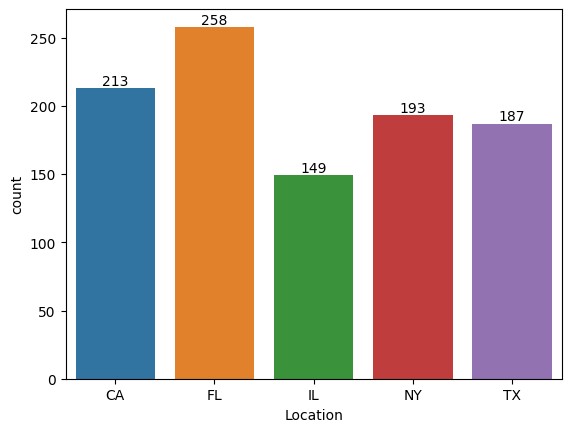

In [ ]:
#Validamos las variables categoricas
sns.countplot(x='Location', data=data)
for bar in plt.gca().patches:
    plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())),
                   ha='center', va='bottom', color='black')
plt.show()

- **Location:** observamos que el estado donde viven mas clientes es el de FL y CA.

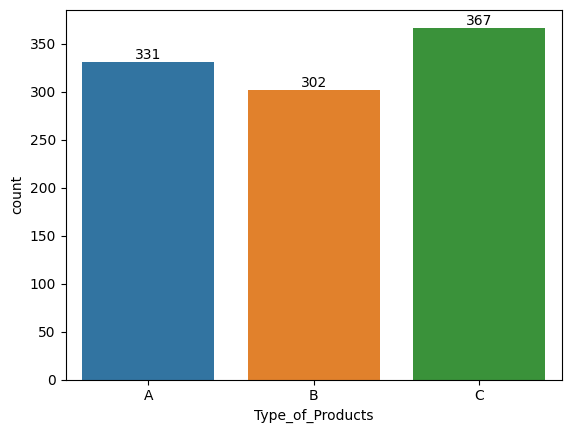

In [ ]:
sns.countplot(x='Type_of_Products', data=data)
for bar in plt.gca().patches:
    plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())),
                   ha='center', va='bottom', color='black')
plt.show()

**Type_of_products:** aunque no hay gran porcentaje de variabilidad en la venta de cada uno de los productos podemos observar que el producto que más se vende es el C segudi del A y el B respectivamente.

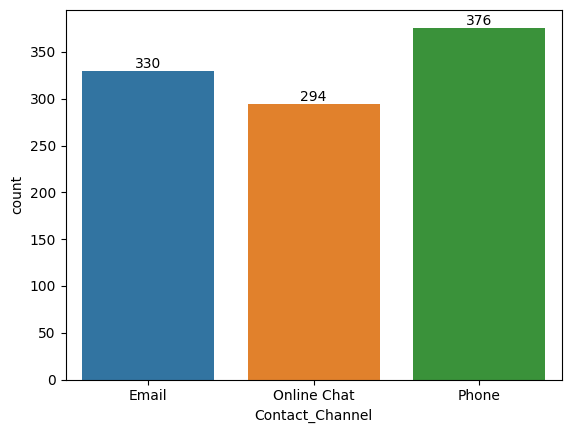

In [ ]:
sns.countplot(x='Contact_Channel', data=data)
for bar in plt.gca().patches:
    plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())),
                   ha='center', va='bottom', color='black')
plt.show()


- **Contact_channel:** el canal mas recurrente de contacto con los clientes es el telefono, seguido del email y el chat en linea respecticamente.

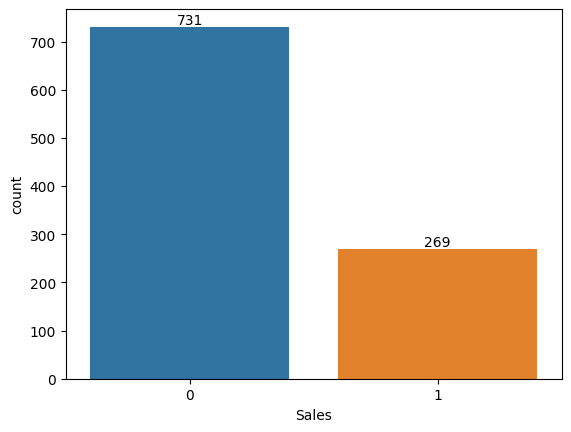

In [ ]:
sns.countplot(x='Sales', data=data)
for bar in plt.gca().patches:
    plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())),
                   ha='center', va='bottom', color='black')
plt.show()


- **Sales:** identificamos 269 ventas efectivas y 731 no realizadas.

- ## **3.4. Limpieza de atípicos:**

Graficamos las variables numerica para visualizar los datos atípicos

In [ ]:
print(data.columns)

Index(['Age', 'Location', 'Income', 'TAX', 'previous sales_# ',
       'Type_of_Products', 'Contact_Channel', 'Contact_hour', 'Num_Contacts',
       'Satisfaction_Score', 'Sales'],
      dtype='object')


In [ ]:
#Cambiamos el nombre de la 'previous sales_#' para que no sea un problema para el gráfico por la forma en la que esta escrito
data.rename(columns={'previous sales_# ': 'previous_sales'}, inplace=True)

In [ ]:
data.head()

,Age,Location,Income,TAX,previous_sales,Type_of_Products,Contact_Channel,Contact_hour,Num_Contacts,Satisfaction_Score,Sales
0,51,FL,80000.0,12000.00,1,B,Email,1900-01-01 05:30:00,1,4,0
1,40,CA,82579.0,12386.85,5,A,Phone,1900-01-01 16:45:00,2,4,1
2,25,NY,58380.0,8757.00,3,C,Online Chat,1900-01-01 06:30:00,4,5,1
3,57,IL,75000.0,11250.00,0,A,Email,1900-01-01 05:30:00,3,2,0
4,61,CA,50049.0,7507.35,0,B,Email,1900-01-01 09:00:00,1,4,0


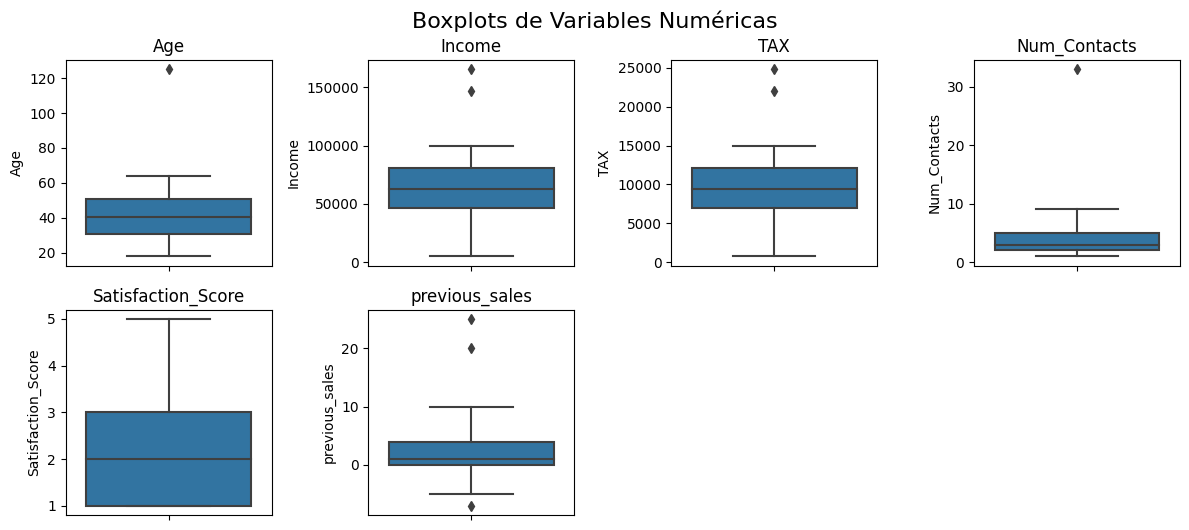

In [ ]:
# Variables numéricas a graficar
columnas_numericas = ['Age', 'Income', 'TAX', 'Num_Contacts', 'Satisfaction_Score', 'previous_sales']

# Calcula el número de filas y columnas necesarias
num_variables = len(columnas_numericas)
num_cols = 4  # Número de columnas en la figura
num_rows = (num_variables - 1) // num_cols + 1

# Crea una figura con subgráficos distribuidos en filas y columnas
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 5), squeeze=False)

# Itera a través de las columnas y crea un boxplot para cada una
for i, columna in enumerate(columnas_numericas):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(data=data, y=columna, ax=axes[row, col])
    axes[row, col].set_title(f'{columna}')

# Elimina los ejes vacíos si no se utilizan
for i in range(num_variables, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.subplots_adjust(top=0.95)
fig.suptitle('Boxplots de Variables Numéricas', fontsize=16, y=1.05)
plt.show()

Identificamos que las variables **Age**, **Income**, **Tax**, **Num_Contacts** y **previous_sales** tienen valores atípicos, aunque no tenemos una regla de calidad para determinar si son errores, se decide que para el presente proyecto realizar una imputación de atípicos con la mediana toda vez que la media mencionada anteriormente para cada variable se encuentra sesgada por los valores extremos.

In [ ]:
#Imputación de atípicos con la mediana
def imputar_outliers(df, variable):
    Q1 = data[variable].quantile(0.25)
    Q3 = data[variable].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    mediana = data[variable].median()

    data.loc[(data[variable] < limite_inferior) | (data[variable] > limite_superior), variable] = mediana

In [ ]:
variables_imputar = ['Age', 'Income', 'TAX', 'Num_Contacts', 'previous_sales']

# Aplicar la función de imputación a cada columna
for variable in variables_imputar:
    imputar_outliers(data, variable)

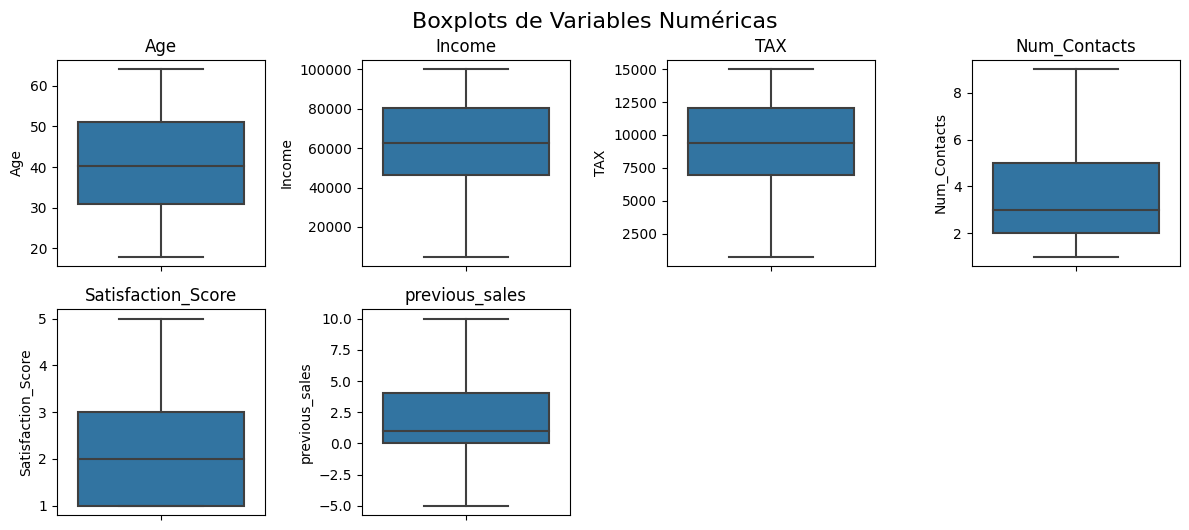

In [ ]:
#Verificamos resultados
columnas_numericas = ['Age', 'Income', 'TAX', 'Num_Contacts', 'Satisfaction_Score', 'previous_sales']

# Calcula el número de filas y columnas necesarias
num_variables = len(columnas_numericas)
num_cols = 4  # Número de columnas en la figura
num_rows = (num_variables - 1) // num_cols + 1

# Crea una figura con subgráficos distribuidos en filas y columnas
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 5), squeeze=False)

# Itera a través de las columnas y crea un boxplot para cada una
for i, columna in enumerate(columnas_numericas):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(data=data, y=columna, ax=axes[row, col])
    axes[row, col].set_title(f'{columna}')

# Elimina los ejes vacíos si no se utilizan
for i in range(num_variables, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.subplots_adjust(top=0.95)
fig.suptitle('Boxplots de Variables Numéricas', fontsize=16, y=1.05)
plt.show()

In [ ]:
data.describe()

,Age,Income,TAX,previous_sales,Contact_hour,Num_Contacts,Satisfaction_Score
count,1000.000000,996.000000,996.000000,1000.00000,1000,1000.000000,1000.000000
mean,41.106500,62912.751004,9436.912651,2.01700,1900-01-01 10:52:12.900000,3.462000,2.558000
min,18.000000,5000.000000,750.000000,-5.00000,1900-01-01 04:15:00,1.000000,1.000000
25%,31.000000,46277.750000,6941.662500,0.00000,1900-01-01 07:15:00,2.000000,1.000000
50%,40.250000,62766.250000,9414.937500,1.00000,1900-01-01 10:45:00,3.000000,2.000000
75%,51.000000,80431.000000,12064.650000,4.00000,1900-01-01 14:00:00,5.000000,3.000000
max,64.000000,99967.000000,14995.050000,10.00000,1900-01-01 18:00:00,9.000000,5.000000
std,11.968758,21227.636782,3184.145517,2.45331,NaN,2.209851,1.331318


Identificamos que la veriable de **previous_sales**,  sigue tiene ventas negativas, debido a que no pueden existir ventas negativas se proceden a realizar nuevamente imputación por mediana

In [ ]:
#Conocemos los datos negativos
data[data['previous_sales'] < 0]

,Age,Location,Income,TAX,previous_sales,Type_of_Products,Contact_Channel,Contact_hour,Num_Contacts,Satisfaction_Score,Sales
710,45.0,TX,39557.0,5933.55,-5,B,Online Chat,1900-01-01 09:15:00,5,1,0


In [ ]:
#Calculamos mediana de la variable

mediana = data[data['previous_sales'] >= 0]['previous_sales'].median()
data.loc[data['previous_sales'] < 0, 'previous_sales'] = mediana

In [ ]:
data['previous_sales'].describe()

count    1000.000000
mean        2.023000
std         2.443449
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max        10.000000
Name: previous_sales, dtype: float64

- ## **3.5. Limpieza de nulos:**

Confirmamos los valores nulos que acutalmente persisten en el dataset

In [ ]:
data.isnull().sum()

Age                   0
Location              0
Income                4
TAX                   4
previous_sales        0
Type_of_Products      0
Contact_Channel       0
Contact_hour          0
Num_Contacts          0
Satisfaction_Score    0
Sales                 0
dtype: int64

In [ ]:
# Calculo de Medianas
imputar = ['Income', 'TAX']
medianas = data[imputar].median()

# Imputar los valores nulos
data[imputar] = data[imputar].fillna(medianas)


In [ ]:
data.isnull().sum()

Age                   0
Location              0
Income                0
TAX                   0
previous_sales        0
Type_of_Products      0
Contact_Channel       0
Contact_hour          0
Num_Contacts          0
Satisfaction_Score    0
Sales                 0
dtype: int64

- ## **3.6. Conversión de variables:**
A continuación procedemos a realizar la conversión de las variables independientes de tipo categoricas, iniciando por la variable "Municipio" a través de técnica de OneHotEncoder (Variables Dummies):

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Age                 1000 non-null   float64       
 1   Location            1000 non-null   category      
 2   Income              1000 non-null   float64       
 3   TAX                 1000 non-null   float64       
 4   previous_sales      1000 non-null   int64         
 5   Type_of_Products    1000 non-null   category      
 6   Contact_Channel     1000 non-null   category      
 7   Contact_hour        1000 non-null   datetime64[ns]
 8   Num_Contacts        1000 non-null   int64         
 9   Satisfaction_Score  1000 non-null   int64         
 10  Sales               1000 non-null   category      
dtypes: category(4), datetime64[ns](1), float64(3), int64(3)
memory usage: 59.3 KB


In [ ]:
df_proyecto = data

In [ ]:
#Variables dummies para convertir las variable Location
dummies_location = pd.get_dummies(df_proyecto['Location'])
df_proyecto = df_proyecto.drop('Location', axis=1)
df_proyecto = df_proyecto.join(dummies_location)

df_proyecto.head()


,Age,Income,TAX,previous_sales,Type_of_Products,Contact_Channel,Contact_hour,Num_Contacts,Satisfaction_Score,Sales,CA,FL,IL,NY,TX
0,51.0,80000.0,12000.00,1,B,Email,1900-01-01 05:30:00,1,4,0,False,True,False,False,False
1,40.0,82579.0,12386.85,5,A,Phone,1900-01-01 16:45:00,2,4,1,True,False,False,False,False
2,25.0,58380.0,8757.00,3,C,Online Chat,1900-01-01 06:30:00,4,5,1,False,False,False,True,False
3,57.0,75000.0,11250.00,0,A,Email,1900-01-01 05:30:00,3,2,0,False,False,True,False,False
4,61.0,50049.0,7507.35,0,B,Email,1900-01-01 09:00:00,1,4,0,True,False,False,False,False


In [ ]:
#Variables dummies para convertir la variable Contact_Channel
dummies_contact = pd.get_dummies(df_proyecto['Contact_Channel'])
df_proyecto = df_proyecto.drop('Contact_Channel', axis=1)
df_proyecto = df_proyecto.join(dummies_contact)

df_proyecto.head()

,Age,Income,TAX,previous_sales,Type_of_Products,Contact_hour,Num_Contacts,Satisfaction_Score,Sales,CA,FL,IL,NY,TX,Email,Online Chat,Phone
0,51.0,80000.0,12000.00,1,B,1900-01-01 05:30:00,1,4,0,False,True,False,False,False,True,False,False
1,40.0,82579.0,12386.85,5,A,1900-01-01 16:45:00,2,4,1,True,False,False,False,False,False,False,True
2,25.0,58380.0,8757.00,3,C,1900-01-01 06:30:00,4,5,1,False,False,False,True,False,False,True,False
3,57.0,75000.0,11250.00,0,A,1900-01-01 05:30:00,3,2,0,False,False,True,False,False,True,False,False
4,61.0,50049.0,7507.35,0,B,1900-01-01 09:00:00,1,4,0,True,False,False,False,False,True,False,False


In [ ]:
#Variables dummies para convertir la variable Type_of_Products
dummies_contact = pd.get_dummies(df_proyecto['Type_of_Products'])
df_proyecto = df_proyecto.drop('Type_of_Products', axis=1)
df_proyecto = df_proyecto.join(dummies_contact)

df_proyecto.head()

,Age,Income,TAX,previous_sales,Contact_hour,Num_Contacts,Satisfaction_Score,Sales,CA,FL,IL,NY,TX,Email,Online Chat,Phone,A,B,C
0,51.0,80000.0,12000.00,1,1900-01-01 05:30:00,1,4,0,False,True,False,False,False,True,False,False,False,True,False
1,40.0,82579.0,12386.85,5,1900-01-01 16:45:00,2,4,1,True,False,False,False,False,False,False,True,True,False,False
2,25.0,58380.0,8757.00,3,1900-01-01 06:30:00,4,5,1,False,False,False,True,False,False,True,False,False,False,True
3,57.0,75000.0,11250.00,0,1900-01-01 05:30:00,3,2,0,False,False,True,False,False,True,False,False,True,False,False
4,61.0,50049.0,7507.35,0,1900-01-01 09:00:00,1,4,0,True,False,False,False,False,True,False,False,False,True,False


In [ ]:
df_proyecto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Age                 1000 non-null   float64       
 1   Income              1000 non-null   float64       
 2   TAX                 1000 non-null   float64       
 3   previous_sales      1000 non-null   int64         
 4   Contact_hour        1000 non-null   datetime64[ns]
 5   Num_Contacts        1000 non-null   int64         
 6   Satisfaction_Score  1000 non-null   int64         
 7   Sales               1000 non-null   category      
 8   CA                  1000 non-null   bool          
 9   FL                  1000 non-null   bool          
 10  IL                  1000 non-null   bool          
 11  NY                  1000 non-null   bool          
 12  TX                  1000 non-null   bool          
 13  Email               1000 non-null   bool         

In [ ]:
#Conversión a entero de las variables tipo bool
for column in df_proyecto.columns:
    if df_proyecto[column].dtype == 'bool':
        df_proyecto[column] = df_proyecto[column].astype(int)


In [ ]:
data['Sales'] = data['Sales'].astype('int')
df_proyecto.head()

,Age,Income,TAX,previous_sales,Contact_hour,Num_Contacts,Satisfaction_Score,Sales,CA,FL,IL,NY,TX,Email,Online Chat,Phone,A,B,C
0,51.0,80000.0,12000.00,1,1900-01-01 05:30:00,1,4,0,0,1,0,0,0,1,0,0,0,1,0
1,40.0,82579.0,12386.85,5,1900-01-01 16:45:00,2,4,1,1,0,0,0,0,0,0,1,1,0,0
2,25.0,58380.0,8757.00,3,1900-01-01 06:30:00,4,5,1,0,0,0,1,0,0,1,0,0,0,1
3,57.0,75000.0,11250.00,0,1900-01-01 05:30:00,3,2,0,0,0,1,0,0,1,0,0,1,0,0
4,61.0,50049.0,7507.35,0,1900-01-01 09:00:00,1,4,0,1,0,0,0,0,1,0,0,0,1,0


- ## **3.6. Analisis Exploratorio:**
A continuación se realiza un análisis exploratorio de los datos a través de la herramienta Pandas Profiling mediante la cual se genera un informe descriptivo del dataset proporcionando una visión general detallada de los datos:

In [ ]:
ProfileReport(df_proyecto)


Output hidden; open in https://colab.research.google.com to view.

Como valor agregado a lo que ya habíamos analizado anteriormente este informe no arroja las alertas de:
- Tipo de producto A esta altamente correlacionado con C
- Tipo de porducto C esta altamente correlacionado con A
- Contacto Email esta altamente correlacionado con Phone
- Income esta altamente correlacionado con TAX
- Contacto Phone esta altamente correlacionado con Email
- TAX esta altamente correlacionado con Income

y como ninguna es nuestra variable objetivo se puede decir que tenemos variables redundantes para la aplicación de un modelo de ML. A continuación realizaremos el análisis de correlaciones para identificar cual de las variables puede ser descartada para el modelo.

- ## **3.7. Análisis de correlaciones:**

En el siguiente apartado procedemos a realizar el análisis de correlación con el objetivo de examinar las relaciónes o asociaciónes entre las variables del dataset.

In [ ]:
matriz_corr = df_proyecto.corr()
matriz_corr

,Age,Income,TAX,previous_sales,Contact_hour,Num_Contacts,Satisfaction_Score,Sales,CA,FL,IL,NY,TX,Email,Online Chat,Phone,A,B,C
Age,1.000000,0.200327,0.200327,0.090586,0.058598,-0.067979,0.010213,0.121561,-0.064249,0.118267,-0.019688,0.004542,-0.051864,-0.064025,-0.055835,0.114670,0.199534,0.005614,-0.200157
Income,0.200327,1.000000,1.000000,0.073675,0.006170,0.014609,0.041160,0.175827,0.003980,0.044216,-0.032816,0.016524,-0.040552,-0.004252,-0.074878,0.074555,0.072025,-0.018802,-0.052409
TAX,0.200327,1.000000,1.000000,0.073675,0.006170,0.014609,0.041160,0.175827,0.003980,0.044216,-0.032816,0.016524,-0.040552,-0.004252,-0.074878,0.074555,0.072025,-0.018802,-0.052409
previous_sales,0.090586,0.073675,0.073675,1.000000,0.042785,-0.083909,0.122214,0.383029,0.005101,0.012228,-0.030388,0.030670,-0.022369,-0.079757,-0.004280,0.081450,0.050805,-0.045435,-0.006321
Contact_hour,0.058598,0.006170,0.006170,0.042785,1.000000,-0.027841,-0.011462,0.097665,-0.024089,-0.029886,-0.006355,0.076872,-0.013172,-0.062571,0.033782,0.028966,0.023431,-0.020073,-0.003755
Num_Contacts,-0.067979,0.014609,0.014609,-0.083909,-0.027841,1.000000,-0.121738,-0.184061,-0.057951,-0.022968,0.024363,0.017018,0.047150,0.045774,-0.027654,-0.018425,0.016431,0.029066,-0.043730
Satisfaction_Score,0.010213,0.041160,0.041160,0.122214,-0.011462,-0.121738,1.000000,0.240479,0.042485,-0.010244,-0.076276,0.000583,0.035954,-0.008215,-0.019880,0.026673,-0.004309,-0.063044,0.064261
Sales,0.121561,0.175827,0.175827,0.383029,0.097665,-0.184061,0.240479,1.000000,0.031412,0.080394,-0.190502,0.046187,0.004031,-0.320223,0.133219,0.185555,-0.076863,-0.069933,0.141659
CA,-0.064249,0.003980,0.003980,0.005101,-0.024089,-0.057951,0.042485,0.031412,1.000000,-0.306768,-0.217686,-0.254416,-0.249504,-0.006701,-0.008696,0.014683,0.007770,0.003586,-0.011001
FL,0.118267,0.044216,0.044216,0.012228,-0.029886,-0.022968,-0.010244,0.080394,-0.306768,1.000000,-0.246738,-0.288370,-0.282803,0.023623,-0.029357,0.004681,-0.031075,-0.024472,0.053650


A continuación realizamos un mapa de calor con el objetivo de observar mejor las correlaciones entre las vairables del dataset:

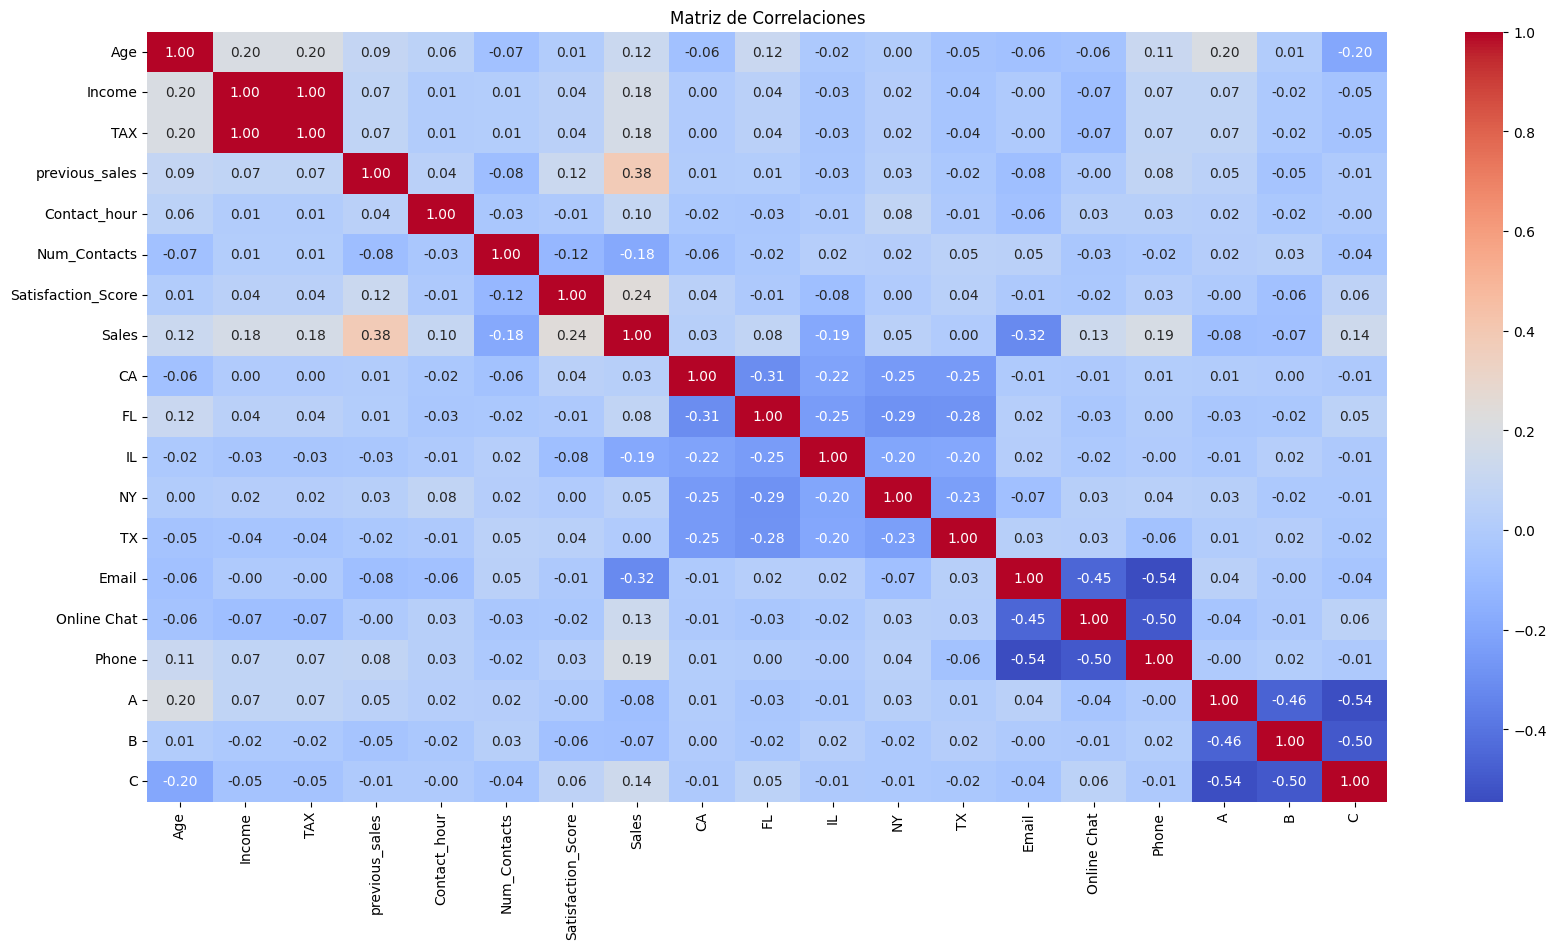

In [ ]:
#Grafico de matriz de correlaciones
plt.figure(figsize=(20,10))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlaciones')
plt.show()

In [ ]:
matriz_corr['Sales_vs_Variables'] = matriz_corr['Sales']
matriz_corr[['Sales_vs_Variables']].sort_values(by = 'Sales_vs_Variables', ascending = False).style.background_gradient (cmap = 'coolwarm')

,Sales_vs_Variables
Sales,1.000000
previous_sales,0.383029
Satisfaction_Score,0.240479
Phone,0.185555
Income,0.175827
TAX,0.175827
C,0.141659
Online Chat,0.133219
Age,0.121561
Contact_hour,0.097665


Conclusiones Correlación entre **variables Independientes** y la **Variable Dependiente**:

- Se observa una correlación directa de 0.38 entre la variable independiente "previous_sales" y la variable dependiente "Sales". Esto indica que a medida que aumentan las ventas previas, también tienden a aumentar las ventas actuales, sugiriendo que clientes con historial de compras podrían ser más propensos a comprar nuevamente.
Puntuación de Satisfacción (Satisfaction_Score)

- Se observa una correlación directa de 0.24 entre la variable independiente "Satisfaction_Score" y la variable dependiente "Sales". Esto sugiere que niveles más altos de satisfacción del cliente están asociados con un aumento en las ventas, destacando la importancia de mantener a los clientes satisfechos.

- Se observa una correlación directa de 0.19 entre la variable independiente "Phone" y la variable dependiente "Sales". Esto puede indicar que las interacciones a través del teléfono son efectivas para incrementar las ventas.

- Se observa una correlación directa de 0.18 para ambas variables independientes "Income" y "TAX" con la variable dependiente "Sales". Esto podría reflejar que los clientes con mayores ingresos y, por ende, mayores impuestos, tienden a realizar más compras.

- Se observa una correlación directa de 0.13 entre la variable independiente "Online Chat" y la variable dependiente "Sales". Esto podría implicar que el chat en línea es una herramienta útil para facilitar las ventas.

- Se observa una correlación directa de 0.12 entre la variable independiente "Age" y la variable dependiente "Sales". Esto puede sugerir que ciertos grupos de edad son más propensos a realizar compras que otros.

- Se observa una correlación directa de 0.10 entre la variable independiente "Contact_hour" y la variable dependiente "Sales". Esto podría indicar que la hora del día en que se contacta a los clientes puede influir levemente en las ventas.

- Se observa una correlación inversa de -0.18 entre la variable independiente "Num_Contacts" y la variable dependiente "Sales". Esto puede indicar que un mayor número de contactos no necesariamente resulta en un aumento de ventas, posiblemente reflejando una saturación o fatiga del cliente.

- Se observa una correlación inversa de -0.19 entre la variable independiente "IL" (Localidad) y la variable dependiente "Sales". Esto puede indicar que la gestión de venta en esta localida probablemente no resulte efectiva.

- Se observa una correlación inversa de -0.32 entre la variable independiente "Email" y la variable dependiente "Sales". Esto sugiere que el uso excesivo de email para contactar clientes podría estar negativamente relacionado con las ventas, lo cual puede indicar que los emails no son el medio más efectivo para algunos segmentos de clientes.

- ## **3.8. Reducción de variables:**

Procedemos a eliminar las variables que contienen una correlación absoluto inferior al 0.1, identificadas anteriormente e igualmente aquellas que sean redundantes es decir variables independientes que tengan una correlacción entre si mayor a 0.8

In [ ]:
df_model = df_proyecto

In [ ]:
# Calcular la correlación absoluta con la variable "diagnosis"
correlaciones_sales = df_model.corr().abs()['Sales']

# Definir el umbral de correlación mínima
threshold = 0.1

# Obtener las variables con correlación menor al umbral
variables_baja_correlacion = correlaciones_sales[correlaciones_sales < threshold].index.tolist()

# Eliminar las variables con menor correlación
df_model.drop(columns=variables_baja_correlacion, inplace=True)

In [ ]:
df_model.head()

,Age,Income,TAX,previous_sales,Num_Contacts,Satisfaction_Score,Sales,IL,Email,Online Chat,Phone,C
0,51.0,80000.0,12000.00,1,1,4,0,0,1,0,0,0
1,40.0,82579.0,12386.85,5,2,4,1,0,0,0,1,0
2,25.0,58380.0,8757.00,3,4,5,1,0,0,1,0,1
3,57.0,75000.0,11250.00,0,3,2,0,1,1,0,0,0
4,61.0,50049.0,7507.35,0,1,4,0,0,1,0,0,0


Debido a que las variables Tax e Income obtuvieron una correlación directa de 1, se procede a eliminar una de las dos, en este caso como ambas tuvieron la misma correlación con la varibale objetivo se puede eliminar cualquiera, para el proyecto vamos a conservar los ingresos (income).

In [ ]:
df_model.drop('TAX', axis=1, inplace=True)
df_model.head()

,Age,Income,previous_sales,Num_Contacts,Satisfaction_Score,Sales,IL,Email,Online Chat,Phone,C
0,51.0,80000.0,1,1,4,0,0,1,0,0,0
1,40.0,82579.0,5,2,4,1,0,0,0,1,0
2,25.0,58380.0,3,4,5,1,0,0,1,0,1
3,57.0,75000.0,0,3,2,0,1,1,0,0,0
4,61.0,50049.0,0,1,4,0,0,1,0,0,0


- ## **3.9. Balanceo de los datos:**
En el siguiente apartado procedemos a realizar el balanceo de datos con el objetivo de nivelar el desequilibrio en la distribución de clases, en pro de mejorar el rendimiento de los modelos, evitando sesgos en la evaluación y garantizando una predicción más justa y efectiva en todas las clases.

In [ ]:
#Verificamos como esta distribuida la variable objetivo
pd.value_counts(df_model['Sales'])

Sales
0    731
1    269
Name: count, dtype: int64

<Axes: xlabel='Sales', ylabel='count'>

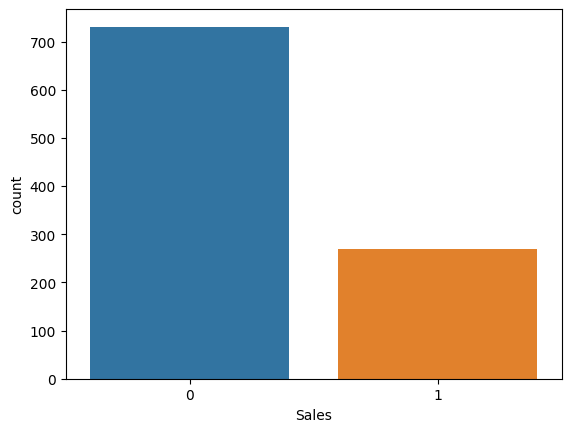

In [ ]:
sns.countplot(x='Sales', data= df_model)

Teniendo en cuenta que la desnivelación es bastante alta y si realizamos un Undersampling quedariamos con muy pocos datos para entrenar un modelo, adicional que estaríamos eliminado información valiosa, se opta por realizar un Oversampling para igualar la clase mas baja a la más alta.

<Axes: xlabel='Sales'>

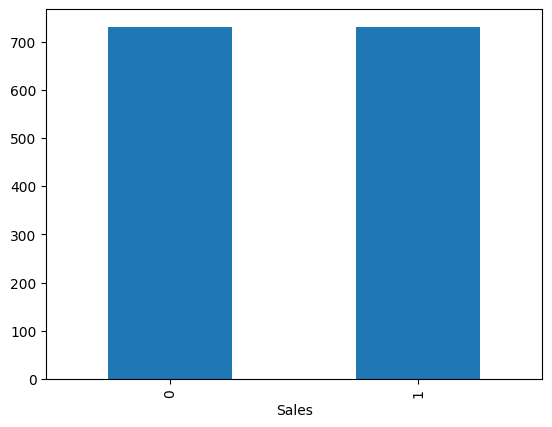

In [ ]:
from imblearn.over_sampling import SMOTENC

sm = SMOTENC(random_state=42, categorical_features = [0])
X_bal, Y_bal = sm.fit_resample(df_model[['Age',	'Income',	'previous_sales',	'Num_Contacts',	'Satisfaction_Score',
                                            'IL',	'Email',	'Online Chat', 'Phone', 'C']], df_model['Sales'])

df_balanceado = pd.DataFrame({'Age' : X_bal['Age'],	'Income': X_bal['Income'],	'previous_sales': X_bal['previous_sales'],
                              'Num_Contacts': X_bal['Num_Contacts'],	'Satisfaction_Score': X_bal['Satisfaction_Score'],
                                            'IL':X_bal['IL'],	'Email': X_bal['Email'],	'Online Chat': X_bal['Online Chat'], 'Phone':X_bal['Phone'], 'C':X_bal['C'],
                            'Sales': Y_bal})
#Visualización del balanceo
pd.value_counts(df_balanceado['Sales']).plot(kind="bar")

In [ ]:
df_balanceado.head()

,Age,Income,previous_sales,Num_Contacts,Satisfaction_Score,IL,Email,Online Chat,Phone,C,Sales
0,51.0,80000.0,1,1,4,0,1,0,0,0,0
1,40.0,82579.0,5,2,4,0,0,0,1,0,1
2,25.0,58380.0,3,4,5,0,0,1,0,1,1
3,57.0,75000.0,0,3,2,1,1,0,0,0,0
4,61.0,50049.0,0,1,4,0,1,0,0,0,0


In [ ]:
df_balanceado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 1462 non-null   float64 
 1   Income              1462 non-null   float64 
 2   previous_sales      1462 non-null   int64   
 3   Num_Contacts        1462 non-null   int64   
 4   Satisfaction_Score  1462 non-null   int64   
 5   IL                  1462 non-null   int64   
 6   Email               1462 non-null   int64   
 7   Online Chat         1462 non-null   int64   
 8   Phone               1462 non-null   int64   
 9   C                   1462 non-null   int64   
 10  Sales               1462 non-null   category
dtypes: category(1), float64(2), int64(8)
memory usage: 115.9 KB


Depues de realizar el balanceo de los datos, observamos que obtenemos un dataframe final con 1.462 registros y conservamos las mismas 11 variables pero ahora con una data balanceada.

- ## **3.10. Transformación de los datos:**
A continuación realizamos estandarización de datos con el objetivo de mejorar la calidad de los datos, facilitar el análisis, el modelado y la interpretación, y garantizar que los algoritmos predictivos y estadísticos funcionen de manera eficiente y efectiva:

Procedemos a realizar estandarización haciendo uso de la librería de StandardScaler de Python para las variables: **Income** y **Age**.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Inicializa el escalador estándar
scaler = StandardScaler()

# Selecciona solo las columnas numéricas
columnas_numericas = ['Age', 'Income']

# Normaliza las columnas numéricas
df_balanceado[columnas_numericas] = scaler.fit_transform(df_balanceado[columnas_numericas])

Observamos el dataset en su versión final balanceado y tranformado (Estandarizado):

In [ ]:
df_balanceado.head()

,Age,Income,previous_sales,Num_Contacts,Satisfaction_Score,IL,Email,Online Chat,Phone,C,Sales
0,0.791168,0.734376,1,1,4,0,1,0,0,0,0
1,-0.158423,0.861337,5,2,4,0,0,0,1,0,1
2,-1.453319,-0.329948,3,4,5,0,0,1,0,1,1
3,1.309127,0.488233,0,3,2,1,1,0,0,0,0
4,1.654433,-0.740072,0,1,4,0,1,0,0,0,0


Finalmente procedemos a almacenar el dataset tratado en los apartados anteriores, dataset próximo a ser fuente e insumo para análisis de los modelos predictivos:

In [ ]:
df_balanceado.to_csv('data_preproceada.csv', index=False)